### 데이터 읽기 및 확인

In [1]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [3]:
uselog.tail()

,log_id,customer_id,usedate
197423,L00000049209753,TS977703,2019-03-31
197424,L00000049209754,TS979550,2019-03-31
197425,L00000049209755,TS995299,2019-03-31
197426,L00000049209756,TS995853,2019-03-31
197427,L00000049209757,TS999079,2019-03-31


In [2]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [4]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [5]:
customer.tail()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0
4191,IK692635,XXXXX,C02,F,2019-03-15 00:00:00,NaN,CA1,0


In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4192 non-null   object
 1   name         4192 non-null   object
 2   class        4192 non-null   object
 3   gender       4192 non-null   object
 4   start_date   4192 non-null   object
 5   end_date     1350 non-null   object
 6   campaign_id  4192 non-null   object
 7   is_deleted   4192 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 262.1+ KB


In [7]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [8]:
# campaign : 캠페인
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


### 고객 데이터 가공

In [9]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000


In [10]:
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [11]:
print(len(customer))
print(len(customer_join))

4192
4192


In [12]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

### 고객데이터 집계

In [13]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [14]:
customer_join.groupby("class_name").count()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,price,campaign_name
class_name,,,,,,,,,,
0_종일,2045,2045,2045,2045,2045,664,2045,2045,2045,2045
1_주간,1019,1019,1019,1019,1019,344,1019,1019,1019,1019
2_야간,1128,1128,1128,1128,1128,342,1128,1128,1128,1128


In [15]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [16]:
customer_join.groupby("campaign_name").count()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
campaign_name,,,,,,,,,,
0_입회비반액할인,650,650,650,650,650,368,650,650,650,650
1_입회비무료,492,492,492,492,492,273,492,492,492,492
2_일반,3050,3050,3050,3050,3050,709,3050,3050,3050,3050


In [17]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [18]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [20]:
# 'start_date'의 데이터 타입 변경
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
# 20180401 이후 데이터만 집계
customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
2831,HI195873,XXX,C01,F,2018-04-02,2018-08-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2832,TS322485,XX,C03,F,2018-04-02,2018-08-31 00:00:00,CA3,1,2_야간,6000,1_입회비무료
2833,IK552971,XXXXX,C02,F,2018-04-02,2018-08-31 00:00:00,CA3,1,1_주간,7500,1_입회비무료
2834,PL000560,XXX,C01,M,2018-04-02,2018-07-31 00:00:00,CA3,1,0_종일,10500,1_입회비무료
2835,HD218970,XXXXX,C01,F,2018-04-02,2018-11-30 00:00:00,CA3,1,0_종일,10500,1_입회비무료
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaN,CA1,0,0_종일,10500,2_일반


In [21]:
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


### 최근데이터 집계

In [23]:
# 'end_date'의 데이터 타입 변경
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반


In [28]:
customer_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 360.4+ KB


In [24]:
# 2019년 이후 탈퇴한 손님 + 탈퇴한 날짜가 없는 손님
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [31]:
len(customer_join.loc[customer_join["end_date"]>=pd.to_datetime("20190331")])

111

In [32]:
len(customer_join.loc[customer_join["end_date"].isna()])

2842

In [33]:
2842 + 111

2953

In [34]:
# 총 손님 수 = 4192

In [25]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [26]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [35]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

### 이용이력 데이터를 집계

In [36]:
# 이용날짜(usedate) 데이터 타입 변환
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
# 이용날짜(usedate)를 편집해 연월 column 추가
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
# 연월마다 그룹 묶기
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()

In [37]:
uselog_months

,연월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [38]:
uselog_months.rename(columns={"log_id":"count"}, inplace=True)

In [39]:
uselog_months

,연월,customer_id,count,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [40]:
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [67]:
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(['mean', "median", "max", "min" ])

In [68]:
uselog_customer

,mean,median,max,min
customer_id,,,,
AS002855,4.500000,5.0,7,2
AS008805,4.000000,4.0,8,1
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,7,3
AS015233,7.545455,7.0,11,4
...,...,...,...,...
TS995853,9.500000,9.5,11,8
TS998593,8.142857,8.0,9,7
TS999079,4.916667,5.5,9,2


In [69]:
# reset_index(drop) : 기존 인덱스를 제거할지의 여부 / True : 제거, False : 열에 추가
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


### 이용이력 데이터로부터 정기이용 여부 플래그 작성

In [47]:
uselog["weekday"] = uselog["usedate"].dt.weekday

In [51]:
uselog["usedate"].dt

,log_id,customer_id,usedate,연월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [52]:
uselog["usedate"].dt

In [53]:
# weekday 요일 출력 0 = 월요일, 6 = 일요일
uselog["usedate"].dt.weekday

0         6
1         6
2         6
3         6
4         6
         ..
197423    6
197424    6
197425    6
197426    6
197427    6
Name: usedate, Length: 197428, dtype: int32

In [48]:
uselog["weekday"]

0         6
1         6
2         6
3         6
4         6
         ..
197423    6
197424    6
197425    6
197426    6
197427    6
Name: weekday, Length: 197428, dtype: int32

In [58]:
# as_index : 그룹화된 열을 결과 데이터 프레임의 인덱스로 사용할지 여부를 지정합니다. False로 설정하면, 그룹화된 열이 인덱스가 아닌 열로 유지됩니다.
uselog_weekday = uselog.groupby(["customer_id","연월","weekday"], 
                                as_index=False).count()[["customer_id","연월", "weekday","log_id"]]

In [59]:
uselog_weekday

,customer_id,연월,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [60]:
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [61]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]

In [62]:
uselog_weekday

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [63]:
uselog_weekday["routine_flg"] = 0

In [64]:
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,0
1,AS008805,4,0
2,AS009013,2,0
3,AS009373,5,0
4,AS015233,5,0
...,...,...,...
4187,TS995853,5,0
4188,TS998593,5,0
4189,TS999079,5,0
4190,TS999231,5,0


In [66]:
# 4번 미만으로 이용한 사람들은 0, 4이상 사용한 사람들은 1
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


### 고객 데이터와 이용이력데이터 결합

In [70]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")

In [72]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1


In [73]:
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [74]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

### 회원기간 계산

In [75]:
# dateutil.relativedelta : 날짜와 시간 간의 상대적인 차이를 계산할 수 있는 기능을 제공
from dateutil.relativedelta import relativedelta

In [78]:
customer_join["calc_date"] = customer_join["end_date"]

In [79]:
# Nan을 20190430으로 변경
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))

In [90]:
# 멤버십 period : 끝, 마침표 / column 추가
customer_join["membership_period"] = 0

In [91]:
len(customer_join)

4192

In [93]:
# 회원등록일자와 탈퇴일자를 사용해 멤버십 이용한 달 계산
for i in range(len(customer_join)):
    delta = relativedelta(customer_join.iloc[i]["calc_date"], customer_join.iloc[i]["start_date"])
    # -1 : 'membership_period'
    customer_join.iloc[i, -1] = delta.years*12 + delta.months
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


### 고객행동의 각종통계량파악

In [95]:
# describe : 묘사하다
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [97]:
# routune_flg : 4회 미만으로 이용한 사람 = 0, 4회 이상으로 이용한 사람 = 1
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

In [101]:
customer_join["membership_period"].value_counts()

membership_period
4     236
2     179
9     172
6     170
8     165
3     159
5     155
7     146
11    144
12    134
1     128
10    121
20     89
23     86
19     79
22     74
32     74
17     74
15     73
34     72
43     71
27     71
16     71
18     71
24     69
46     69
31     69
28     67
40     67
26     64
41     63
13     62
47     62
21     62
33     62
25     60
29     59
30     59
36     57
39     56
14     55
37     55
42     54
35     53
44     53
45     53
38     48
Name: count, dtype: int64

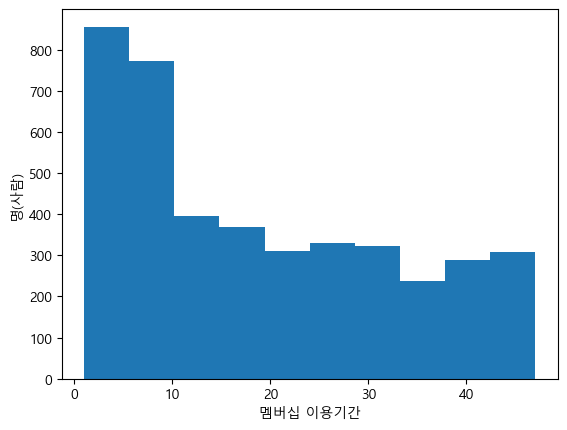

In [104]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 표시 문제 해결

# 1 ~ 10 개월 정도 이용한 사람이 가장 많다
plt.hist(customer_join["membership_period"])
plt.xlabel("멤버십 이용기간")
plt.ylabel('명(사람)')
plt.show()

### 탈퇴회원과 지속회원의 차이를 파악

In [ ]:
# 탈퇴한 회원과 end_date에 날짜가 적혀있는 회원의 수는 같다

In [108]:
customer_join['is_deleted'].value_counts()

is_deleted
0    2842
1    1350
Name: count, dtype: int64

In [111]:
customer_join.end_date.value_counts(dropna=False)

end_date
NaT           2842
2019-02-28     149
2019-01-31     129
2018-05-31     125
2018-04-30     121
2018-08-31     113
2018-12-31     111
2019-03-31     111
2018-06-30     106
2018-09-30     104
2018-07-31     102
2018-10-31      90
2018-11-30      89
Name: count, dtype: int64

In [112]:
customer_join.end_date.value_counts().sum()

1350

In [114]:
# 탈퇴한 회원 통계
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe(include='number')

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000


In [115]:
# 이용하는 회원 통계
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe(include='number')

,is_deleted,price,mean,median,max,min,routine_flg,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000


In [117]:
# 파일 저장
customer_join.to_csv("customer_join.csv", index=False, encoding='cp949')